In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as style
import pandas as pd
import pandas_datareader.data as web
import investpy as inv

In [3]:
start = "2/4/2020"
end = "21/11/2021"
mex = inv.indices.get_index_historical_data(index='S&P/BMV IPC',country='Mexico',from_date=start,to_date=end,interval = "Weekly")
bra = inv.indices.get_index_historical_data(index='Bovespa',country='Brazil',from_date=start,to_date=end,interval = "Weekly")
arg = inv.indices.get_index_historical_data(index='S&P Merval',country='Argentina',from_date=start,to_date=end,interval = "Weekly")
col = inv.indices.get_index_historical_data(index='COLCAP',country='Colombia',from_date=start,to_date=end,interval = "Weekly")
ch = inv.indices.get_index_historical_data(index='S&P CLX IPSA',country='Chile',from_date=start,to_date=end,interval = "Weekly")

In [4]:
indices = pd.concat([mex["Close"],bra["Close"],arg["Close"],col["Close"],ch["Close"]],axis=1)
indices.columns = ["México", "Brasil", "Argentina", "Colombia", "Chile"]

In [5]:
indices.head()

,México,Brasil,Argentina,Colombia,Chile
Date,,,,,
2020-04-05,34567.78,77682.0,28017.59,1187.13,3822.18
2020-04-12,34743.10,78990.0,29883.27,1192.08,3819.61
2020-04-19,34586.82,75331.0,29258.10,1122.37,3679.67
2020-04-26,36470.11,80506.0,32742.84,1142.04,3977.56
2020-05-03,37623.68,80263.0,36183.90,1110.26,3818.24


In [6]:
returns = indices.pct_change()[1:]
returns.head()

,México,Brasil,Argentina,Colombia,Chile
Date,,,,,
2020-04-12,0.005072,0.016838,0.066590,0.004170,-0.000672
2020-04-19,-0.004498,-0.046322,-0.020920,-0.058478,-0.036637
2020-04-26,0.054451,0.068697,0.119103,0.017525,0.080956
2020-05-03,0.031631,-0.003018,0.105094,-0.027827,-0.040055
2020-05-10,-0.051358,-0.033714,0.088560,-0.050898,-0.051356


In [7]:
cumulative_return = ((returns+1).cumprod()-1)*100

In [8]:
cumulative_return.head()

,México,Brasil,Argentina,Colombia,Chile
Date,,,,,
2020-04-12,0.507177,1.683788,6.658960,0.416972,-0.067239
2020-04-19,0.055080,-3.026441,4.427611,-5.455173,-3.728500
2020-04-26,5.503188,3.635334,16.865298,-3.798236,4.065219
2020-05-03,8.840313,3.322520,29.147082,-6.475281,-0.103083
2020-05-10,3.250455,-0.160912,40.584290,-11.235501,-5.233401


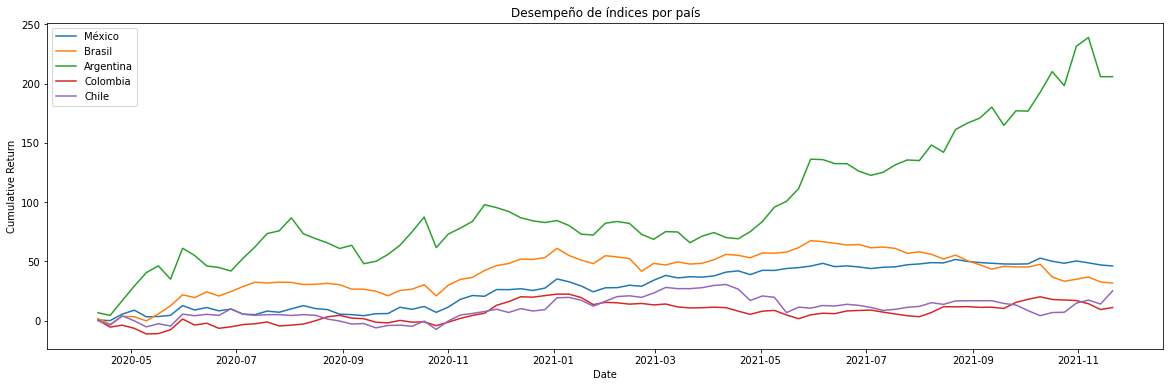

In [11]:
plt.figure(figsize=(20,6))
plt.plot(cumulative_return)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(indices.columns)
plt.title("Desempeño de índices por país")
plt.show()

In [10]:
cumulative_return.iloc[-1]

México        46.130616
Brasil        31.677866
Argentina    205.861960
Colombia      11.054392
Chile         25.083329
Name: 2021-11-21 00:00:00, dtype: float64